# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [3]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [3]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

## Step 1 : Read the data CSV from your s3 bucket.

In [4]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data

df = pd.read_csv("s3://mds-s3-3-arjun/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [5]:
## Use your ML skills to get from step 1 to step 6
df

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed rainfall
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557933e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771376,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660564e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225226e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472225e-07,5.301038e-01,0.002699,2.185453,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920357,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895054,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912631e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645497,4.249335e+01,5.833800e-01,5.939502e-09,8.146937e-01,4.938900e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391160e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169670,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140724,1.444630,0.025719


## Step 2: Drop rows with nans.

In [6]:
data = df.dropna()

In [7]:
data.shape

(45989, 26)

## Step 3: Split the data into train (80%) and test (20%).

In [8]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=123)

## Step 4: Carry out EDA of your choice on the train split.

In [13]:
# Glimpse data structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36791 entries, 1953-10-26 to 1932-01-31
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ACCESS-CM2         36791 non-null  float64
 1   ACCESS-ESM1-5      36791 non-null  float64
 2   AWI-ESM-1-1-LR     36791 non-null  float64
 3   BCC-CSM2-MR        36791 non-null  float64
 4   BCC-ESM1           36791 non-null  float64
 5   CMCC-CM2-HR4       36791 non-null  float64
 6   CMCC-CM2-SR5       36791 non-null  float64
 7   CMCC-ESM2          36791 non-null  float64
 8   CanESM5            36791 non-null  float64
 9   EC-Earth3-Veg-LR   36791 non-null  float64
 10  FGOALS-g3          36791 non-null  float64
 11  GFDL-CM4           36791 non-null  float64
 12  INM-CM4-8          36791 non-null  float64
 13  INM-CM5-0          36791 non-null  float64
 14  KIOST-ESM          36791 non-null  float64
 15  MIROC6             36791 non-null  float64
 16  MPI-E

In [14]:
# Summary statistics
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed rainfall
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503055e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644145e-02,2.986510e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445457,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732647e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967640,157.605710,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569750,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898110,163.164520,1.549718e+02,1.673562e+02,192.933030


In [15]:
# Models correlation
train_df.corr()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed rainfall
ACCESS-CM2,1.000000,0.004301,-0.002196,0.001120,0.012212,0.014959,0.013621,-0.001929,0.007494,0.016180,...,0.015190,-0.002103,0.003325,-0.001989,-0.000679,0.015473,0.012199,0.002825,0.008217,-0.001819
ACCESS-ESM1-5,0.004301,1.000000,0.002516,-0.000938,0.006826,-0.002993,-0.001814,-0.000479,0.015096,0.007861,...,0.014543,0.002740,0.010092,0.000679,0.006235,-0.000263,0.004423,0.004642,0.008042,0.014944
AWI-ESM-1-1-LR,-0.002196,0.002516,1.000000,0.006778,0.001071,0.006790,0.008443,0.013938,0.011723,0.014522,...,0.022383,0.000692,0.013242,-0.007148,0.008226,-0.000067,0.003907,0.012480,0.012393,0.007980
BCC-CSM2-MR,0.001120,-0.000938,0.006778,1.000000,0.005123,0.002008,0.009563,0.010369,0.006881,0.009313,...,0.005966,0.001597,0.000282,0.002052,0.017880,-0.004023,0.007445,0.006044,0.010858,0.019322
BCC-ESM1,0.012212,0.006826,0.001071,0.005123,1.000000,0.013169,0.007128,0.007559,0.002319,0.008151,...,0.010383,0.000496,0.005589,-0.007730,0.012255,0.002084,0.000292,0.000181,0.012054,-0.002095
CMCC-CM2-HR4,0.014959,-0.002993,0.006790,0.002008,0.013169,1.000000,0.018048,0.028906,-0.002168,0.001551,...,0.000440,0.012643,0.003923,0.001001,0.024052,0.027495,0.005924,0.019143,0.032189,-0.000779
CMCC-CM2-SR5,0.013621,-0.001814,0.008443,0.009563,0.007128,0.018048,1.000000,0.015763,0.004703,0.006975,...,-0.011926,0.014458,0.007409,-0.008899,0.029234,0.026755,0.012372,0.019419,0.021328,0.003907
CMCC-ESM2,-0.001929,-0.000479,0.013938,0.010369,0.007559,0.028906,0.015763,1.000000,-0.000963,0.018151,...,-0.005885,0.014692,0.011109,-0.001907,0.022093,0.019827,0.006402,0.013341,0.019474,0.005414
CanESM5,0.007494,0.015096,0.011723,0.006881,0.002319,-0.002168,0.004703,-0.000963,1.000000,0.008968,...,0.022990,-0.003799,0.025278,0.002183,0.008598,0.003193,0.011492,0.005744,0.004696,0.010064
EC-Earth3-Veg-LR,0.016180,0.007861,0.014522,0.009313,0.008151,0.001551,0.006975,0.018151,0.008968,1.000000,...,0.016401,0.009200,0.012275,-0.000223,0.012973,-0.004913,0.006460,0.014647,0.012603,0.001016


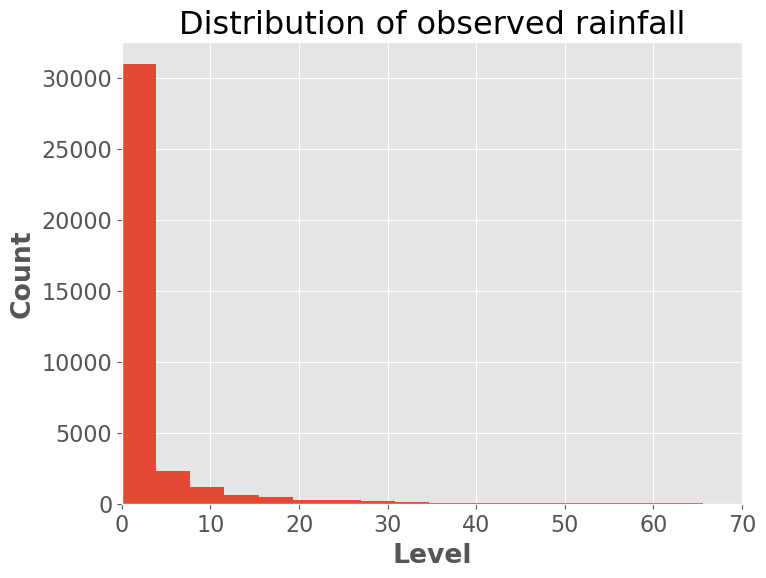

In [21]:
# Distribution observed value
plt.hist(train_df['observed rainfall'], bins=50)
plt.title('Distribution of observed rainfall')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xlim(0, 70)
plt.show()

## Step 5: rain ensemble machine learning model using RandomForestRegressor

In [6]:
# Separate features and target
X_train = train_df.drop('observed rainfall', axis=1)
y_train = train_df['observed rainfall']
X_test = test_df.drop('observed rainfall', axis=1)
y_test = test_df['observed rainfall']

In [7]:
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [8]:
# Make prediction on train
y_pred_train = rf.predict(X_train)

# Make predictions on test
y_pred_test = rf.predict(X_test)

In [9]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f"RMSE for test data: {rmse_train}")

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE for test data: {rmse_test}")

RMSE for test data: 3.2415357124566713
RMSE for test data: 8.081429130013323


## Step 6 - Discuss your results.

In [10]:
# Compare the results of the ensemble model with individual climate models:

rmse_df = pd.DataFrame({
    "Model": X_test.columns,
    "Train RMSE" : [mean_squared_error(y_train, X_train[column], squared=False) for column in X_train.columns],
    "Test RMSE": [mean_squared_error(y_test, X_test[column], squared=False) for column in X_test.columns]
}).set_index("Model").sort_values("Test RMSE")
%timeit rmse_df

26.8 ns ± 0.304 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [11]:
rmse_df

,Train RMSE,Test RMSE
Model,,
FGOALS-g3,9.497266,8.825898
KIOST-ESM,9.364012,8.929471
MPI-ESM1-2-HR,9.697459,9.136171
NESM3,9.559615,9.238419
MPI-ESM1-2-LR,9.907773,9.358796
GFDL-CM4,10.151643,9.460040
MRI-ESM2-0,9.716749,9.494019
EC-Earth3-Veg-LR,10.125208,9.560820
NorESM2-LM,10.072092,9.801393


Comparing the RF ensemble model's performance to the individual climate models, we can see that the RF model outperforms all individual models in terms of RMSE for both the training and test datasets. The RF model's Test RMSE of 8.081429130013323 is lower than the best performing individual model (FGOALS-g3) with a Test RMSE of 8.825898.

In conclusion, we are getting better results with the ensemble model (Random Forest) compared to the individual climate models, as evidenced by the lower RMSE values.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [12]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [13]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 8.11
 Test RMSE: 7.81


In [14]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.